### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="http://github.com/Nak007/charts"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
# All *.py will be stored under the following 
# location i.e. '/content/charts'.
!git clone 'http://github.com/Nak007/charts.git'

In [1]:
# Import libraries.
import pandas as pd, numpy as np, os
import datetime
from ipywidgets import interact, fixed
from Gantt_plot import *
pd.options.display.float_format = '{:,.3f}'.format

## Examples
Master Schedule

In [2]:
df = pd.read_excel('work_schedule.xlsm', sheet_name="Schedule").drop(columns=["start_date","days"])
df.head(2)

,type,ref_id,task,description,deliverables,completion,start,end,member1,member2,member3
0,Project,P0001,Task A,Description 1,Deliverable 1,1.000,2022-02-15,2022-02-22,1,0,1
1,Project,P0002,Task B,Description 2,Deliverable 2,1.000,2022-02-18,2022-02-23,0,0,1


Thailand public holidays

In [3]:
holidays = pd.read_excel('work_schedule.xlsm', sheet_name="PublicHolidays").drop(columns=["Holiday"])
holidays = np.array(holidays, dtype="datetime64[D]").ravel()
holidays

array(['2022-01-01', '2022-01-03', '2022-02-16', '2022-04-06',
       '2022-04-13', '2022-04-14', '2022-04-15', '2022-05-04',
       '2022-05-13', '2022-05-16', '2022-06-03', '2022-07-13',
       '2022-07-14', '2022-07-28', '2022-08-12', '2022-10-13',
       '2022-10-23', '2022-10-24', '2022-12-05', '2022-12-10',
       '2022-10-12', '2022-12-31'], dtype='datetime64[D]')

Create reference date (`ref_date`) and input for **`gantt_plot`**.

In [4]:
ref_date = pd.Timestamp(2022,3,1)
X = create_schedule(df.copy(), ref_date, holidays)
X = X.sort_values(by="start", ascending=False).reset_index(drop=True)
X.head(2)

,type,ref_id,task,description,deliverables,completion,start,end,member1,member2,...,start_num,end_num,duration,busday,prog_day,exp_day,plan,diff_pct,diff_day,status
0,Project,P0014,Task N,Description 14,Deliverable 14,0.000,2022-03-17,2022-03-19,0,0,...,30,32,2,2,0.000,0,0.000,0.000,0.000,on-time
1,Project,P0013,Task M,Description 13,Deliverable 13,0.000,2022-03-16,2022-03-19,1,1,...,29,32,3,3,0.000,0,0.000,0.000,0.000,on-time


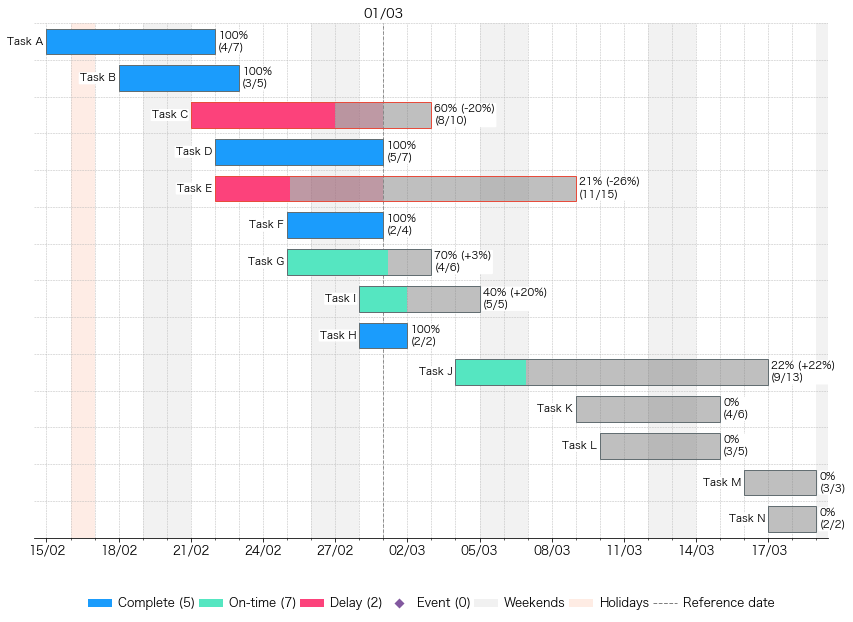

In [5]:
ax = gantt_plot(X, 
                ref_date=ref_date, 
                holidays=holidays, 
                show_delta=True, 
                show_vline=True, 
                show_hline=True, 
                show_days=True)

### Interactive chart

Create interactive function.

In [6]:
def interactive_gantt(df, ref_date, major_locator, holidays, 
                      show_delta, start_date, end_date):
    
    X = create_schedule(df.copy(), ref_date, holidays=holidays)
    X = X.sort_values(by="start", ascending=False).reset_index(drop=True)
    ax = gantt_plot(X, ref_date=ref_date, 
                    holidays=holidays, 
                    major_locator=major_locator, 
                    show_delta=show_delta, 
                    start_date=start_date, 
                    end_date=end_date)

Create interactive inputs.

In [7]:
bus_days = workingdays(X["start"].min(), X["end"].max())
dates = np.arange(X["start"].min(), X["end"].max()+ 
                  np.timedelta64(1,'D'), dtype="datetime64[D]")

kwargs = dict(df=fixed(df), 
              ref_date=bus_days, 
              major_locator = [3,4,5,6,7],
              holidays=fixed(holidays), 
              show_delta=[False, True], 
              start_date=dates, 
              end_date=dates[::-1])

In [8]:
ax = interact(interactive_gantt, **kwargs)

interactive(children=(Dropdown(description='ref_date', options=(numpy.datetime64('2022-02-15'), numpy.datetime…

Save files

['masterschedule_20230606.png', 'P0004_20230606.png', 'P0010_20230606.png']

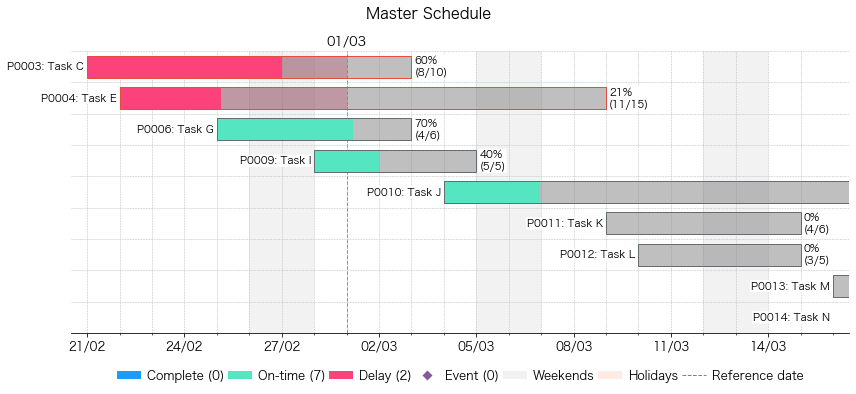

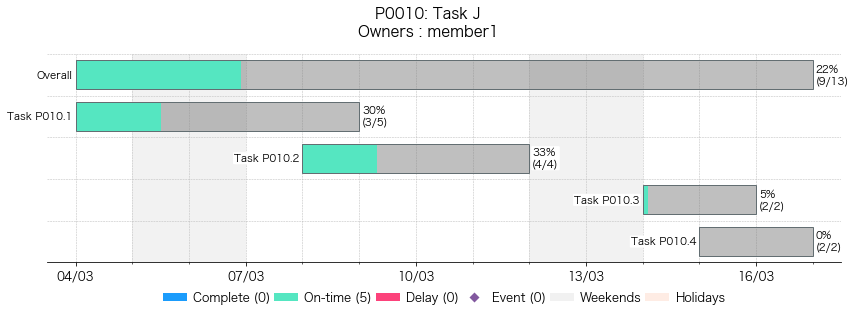

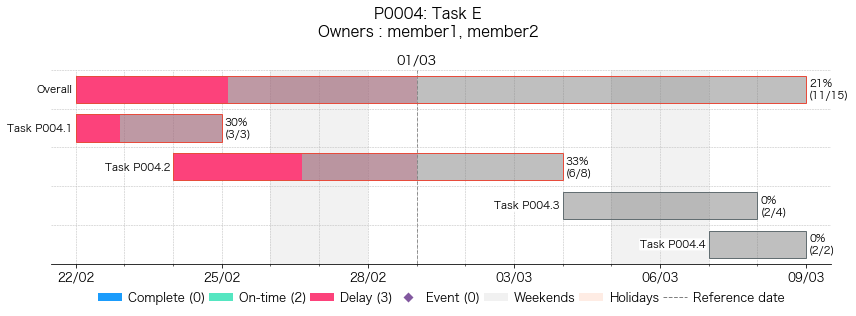

In [9]:
today = pd.Timestamp(datetime.date.today())
os.listdir(PrintSchedules("work_schedule.xlsm", kwargs=dict(ref_date=pd.Timestamp(2022,3,1))))